In [1]:
# First name: Anirudh Deshpande Netid: axr8193 

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
#Loading the csv file on to the dataframe
df = pd.read_csv('census1994.csv')

In [4]:
# Dropping NAN va;ues from the dataframe
df_census_new = df.replace(regex='\?', value=np.nan)
df_new_census = df_census_new.dropna()

In [5]:
# Printing first five elements of the dataframe
df_new_census.head(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Printing last five values of the dataframe
df_new_census.tail(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
32556,12/29/1994,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1/30/1994,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,9/26/1994,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,4/5/1994,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,3/5/1994,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
# Printing the class values
print(df_new_census['class'])
df_new_census.shape[1]

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
5         <=50K
6         <=50K
7          >50K
8          >50K
9          >50K
10         >50K
11         >50K
12        <=50K
13        <=50K
15        <=50K
16        <=50K
17        <=50K
18        <=50K
19         >50K
20         >50K
21        <=50K
22        <=50K
23        <=50K
24        <=50K
25         >50K
26        <=50K
28        <=50K
29        <=50K
30        <=50K
31        <=50K
          ...  
32526     <=50K
32527     <=50K
32528     <=50K
32529     <=50K
32532      >50K
32533      >50K
32534     <=50K
32535     <=50K
32536      >50K
32537     <=50K
32538      >50K
32540     <=50K
32543     <=50K
32544     <=50K
32545      >50K
32546     <=50K
32547     <=50K
32548     <=50K
32549     <=50K
32550     <=50K
32551     <=50K
32552     <=50K
32553     <=50K
32554      >50K
32555     <=50K
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: class, Length: 301

16

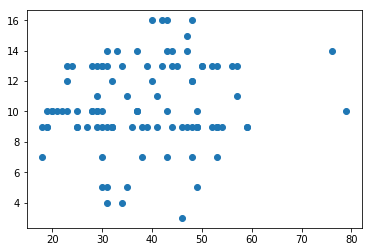

<Figure size 14400x14400 with 0 Axes>

In [8]:
# Plotting scatter plot and starting convertion of categorical variables
x = df_new_census.iloc[:, 1:15]
y = df_new_census['class'].str.strip()
for i,j in x.iterrows():
    j = j.str.strip()
plt.scatter(df_new_census['Age'][:100], df_new_census['education-num'][:100])
plt.figure(figsize=(200,200))
plt.show()

In [9]:
# Converting categorical data values to numerical data values using Labelencoder and selecting two attributes for running KNN model
lb_make = LabelEncoder()
y_class = lb_make.fit_transform(y)
X = x[['Age', 'education-num']]
'''
for c in X.columns:
    X[c] = lb_make.fit_transform(X[c])
'''
data2 = x[['Age', 'education-num', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']]
data2['fnlwgt'] = (data2['fnlwgt']-data2['fnlwgt'].mean())/data2['fnlwgt'].std()
data2['capital-gain'] = (data2['capital-gain']-data2['capital-gain'].mean())/data2['capital-gain'].std()
data2['capital-loss'] = (data2['capital-loss']-data2['capital-loss'].mean())/data2['capital-loss'].std()

C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Anirudh Deshpande\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [10]:
# Splitting dataset into train and test data set in the ratio 70:30
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
accuracies = []
print(X_test)

In [11]:
# instanciating the KNN object into classifier variable
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

In [12]:
# fitting the model and predicting y_pred
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [23]:
# calculation of the accuracy and the confusion matrix for k = 3
accuracy = classifier.score(X_test, Y_test)
accuracies.append(accuracy)
print(accuracy)
cm = confusion_matrix(Y_test, y_pred)
print(cm)
cr = classification_report(Y_test, y_pred)
print(cr)

0.7587578737982097
[[6023  741]
 [1442  843]]
              precision    recall  f1-score   support

       <=50K       0.81      0.89      0.85      6764
        >50K       0.53      0.37      0.44      2285

    accuracy                           0.76      9049
   macro avg       0.67      0.63      0.64      9049
weighted avg       0.74      0.76      0.74      9049



In [25]:
# Performing the step step shown before for k = 5
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
acc = classifier.score(X_test, Y_test)
accuracies.append(acc)
cs = confusion_matrix(Y_test, y_pred)
print(cs)
cd = classification_report(Y_test, y_pred)
print(cd)

[[6075  689]
 [1489  796]]
              precision    recall  f1-score   support

       <=50K       0.80      0.90      0.85      6764
        >50K       0.54      0.35      0.42      2285

    accuracy                           0.76      9049
   macro avg       0.67      0.62      0.64      9049
weighted avg       0.74      0.76      0.74      9049



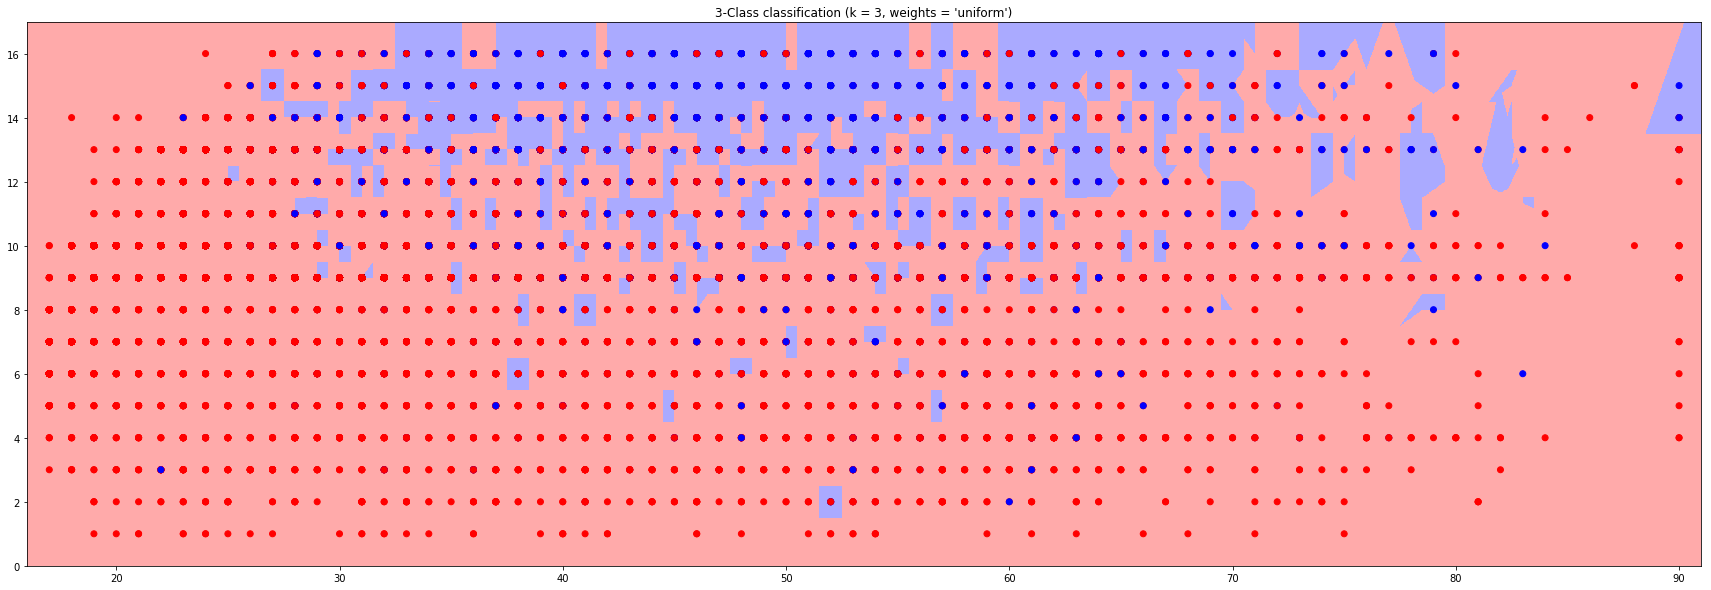

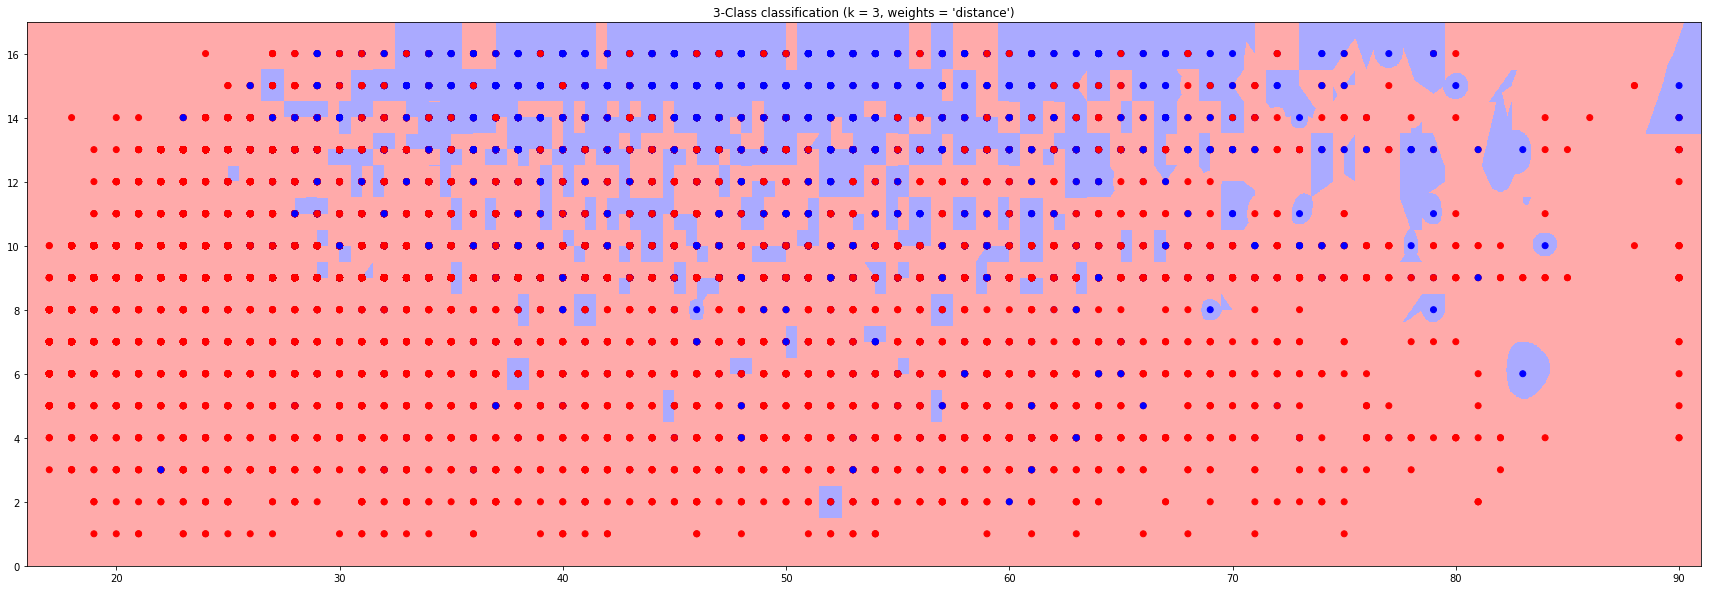

In [15]:
# Plotting graph for displaying decision boundaries for k = 3
import matplotlib.pyplot as plt

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = 0.02
n_neighbors = 3

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y_class)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(30,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_class, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()

In [26]:
# Performing the step step shown before for k = 7
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
acc = classifier.score(X_test, Y_test)
accuracies.append(acc)
cb = confusion_matrix(Y_test, y_pred)
print(cb)
ck = classification_report(Y_test, y_pred)
print(ck)

[[6023  741]
 [1442  843]]
              precision    recall  f1-score   support

       <=50K       0.81      0.89      0.85      6764
        >50K       0.53      0.37      0.44      2285

    accuracy                           0.76      9049
   macro avg       0.67      0.63      0.64      9049
weighted avg       0.74      0.76      0.74      9049



In [17]:
accuracies

[0.7526798541275279, 0.759310421040999, 0.7587578737982097]

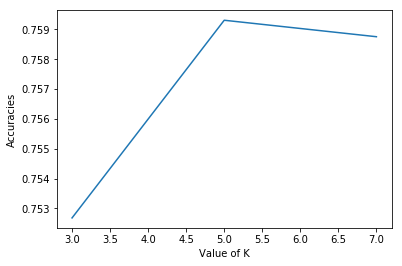

In [18]:
# Plotting graph for comparing accuracies for k = 3,5,7
plt.plot([3,5,7], accuracies)
plt.ylabel('Accuracies')
plt.xlabel('Value of K')
plt.show()

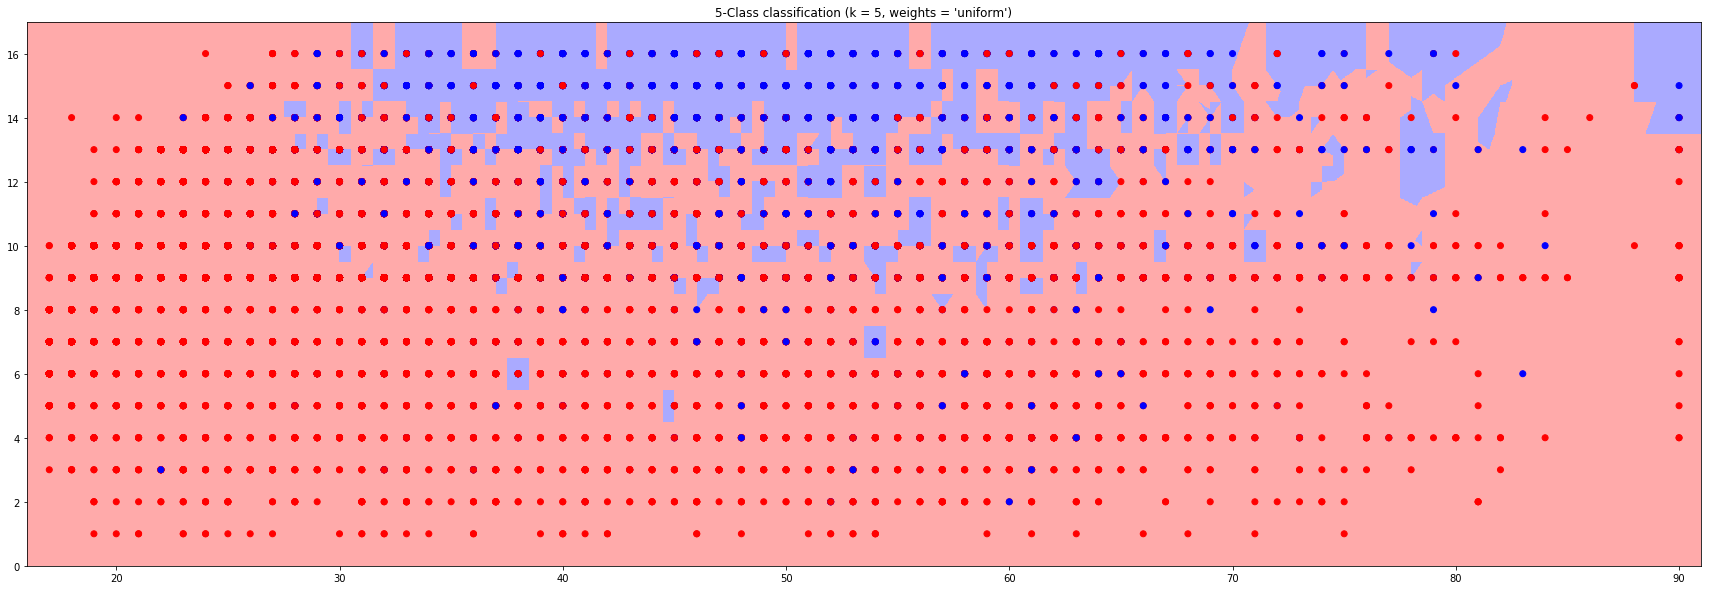

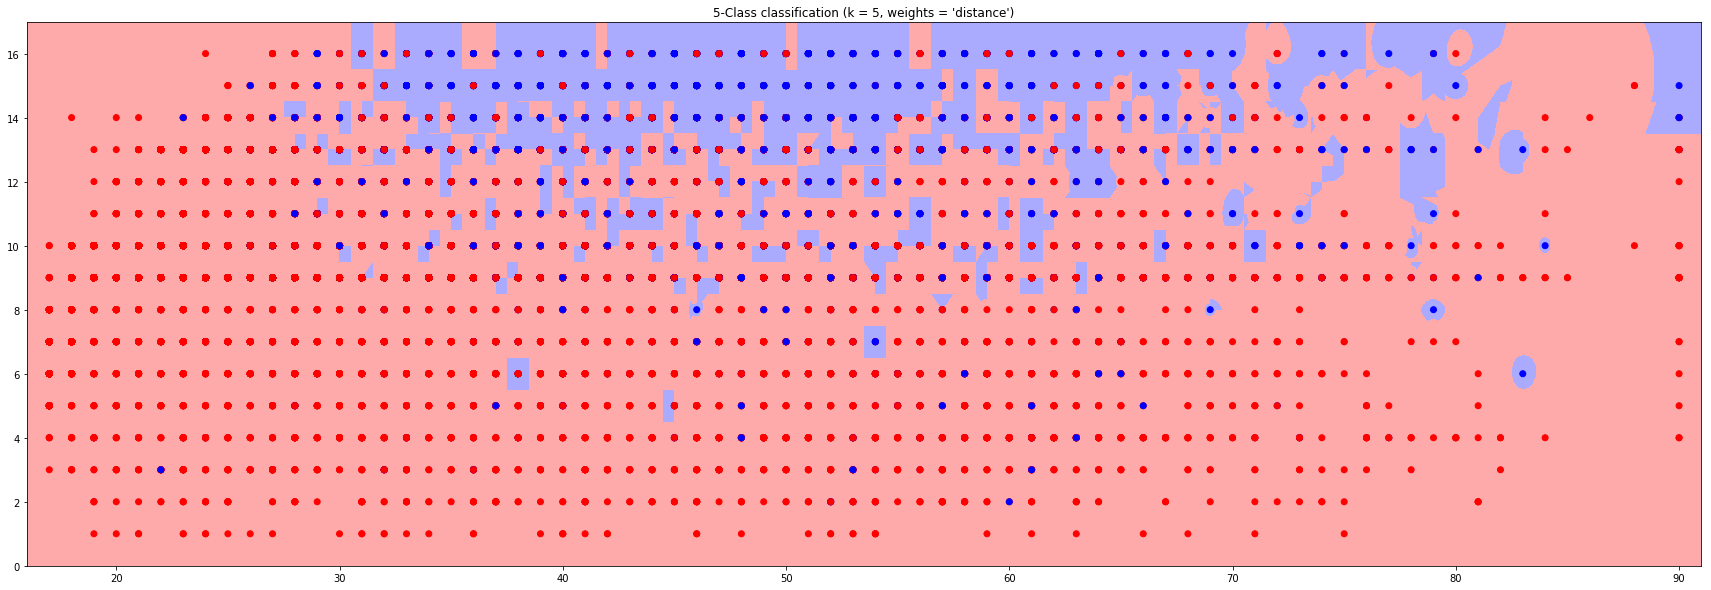

In [20]:
# Plotting graph for displaying decision boundaries for k = 5
import matplotlib.pyplot as plt

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = 0.02
n_neighbors = 5

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y_class)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(30,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_class, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()

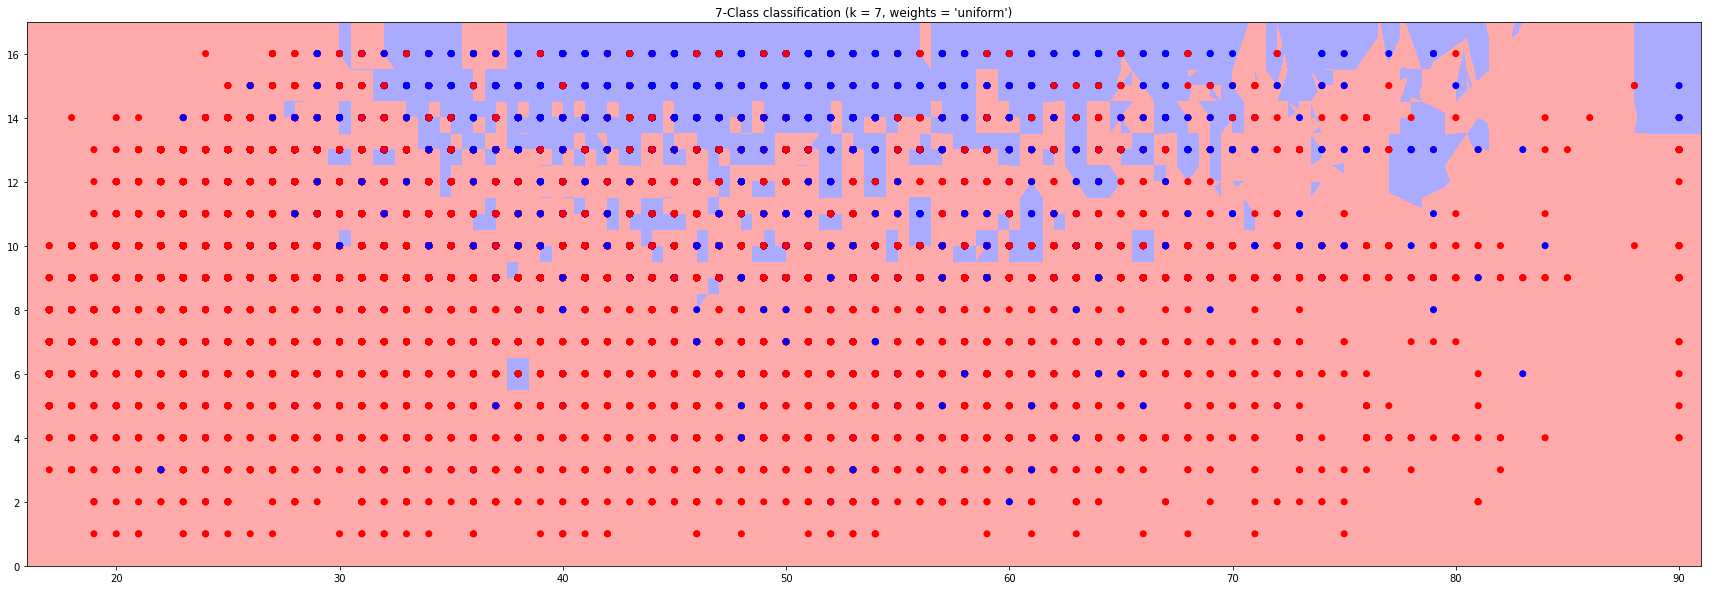

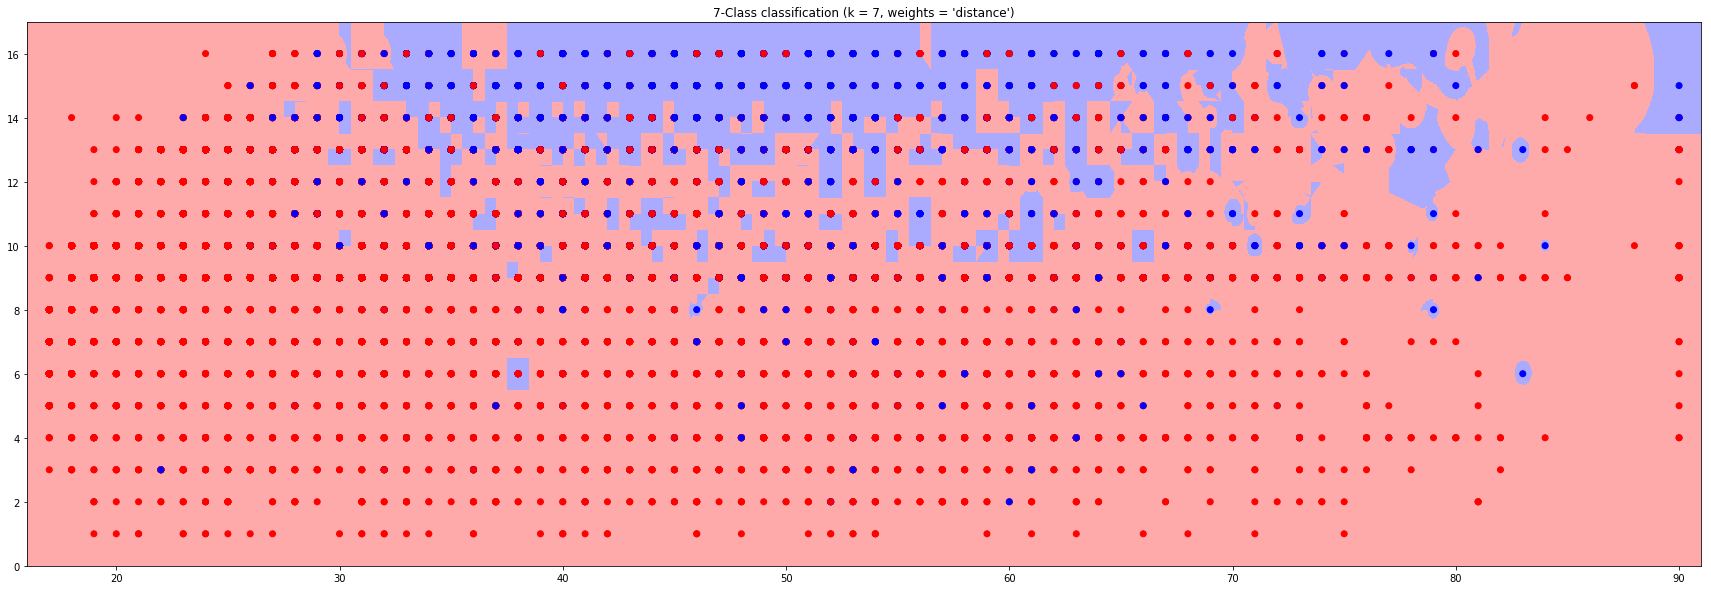

In [22]:
# Plotting graph for displaying decision boundaries for k = 7
import matplotlib.pyplot as plt

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = 0.02
n_neighbors = 7

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y_class)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(30,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_class, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("7-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()